In [21]:
from linearmodels.datasets import wage_panel
import pandas as pd
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
import seaborn as sns

In [3]:
from linearmodels.iv import IV2SLS

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('fitbit_data.csv', index_col=0)

In [6]:
df.head()

,Id,Date,Calories_x,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories_y,Weekday
0,1503960366,4/12/2016,1985,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,4/13/2016,1797,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,4/14/2016,1776,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,4/15/2016,1745,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,4/16/2016,1863,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [7]:
df.drop('Calories_y',axis=1, inplace=True)

In [28]:
df.Date = pd.to_datetime(df.Date)

In [29]:
# Import and preprocess data
import pandas as pd
dataset = pd.read_csv('fitbit_data.csv', usecols = ['Id', 'Date', 'VeryActiveMinutes', 'Calories_x'],\
 index_col = ['Id', 'Date'])
years = dataset.index.get_level_values('Date').to_list()
dataset['Date'] = pd.Categorical(years)

In [11]:
dataset.dtypes

Calories_x              int64
VeryActiveMinutes       int64
Date                 category
dtype: object

In [30]:
exog = exog.reset_index(level='Date')

NameError: name 'exog' is not defined

In [12]:
exog.Date = pd.to_datetime(exog.Date)

NameError: name 'exog' is not defined

In [13]:
exog = exog.reset_index().set_index(['Id','Date'])

NameError: name 'exog' is not defined

In [14]:
exog

NameError: name 'exog' is not defined

# OLS old school

In [16]:
from statsmodels.formula.api import ols
model = ols('Calories_x ~ VeryActiveMinutes', data=df) # dependent ~ independent

In [17]:
model_fit = model.fit() #calculates everything

In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Calories_x   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     573.1
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           3.17e-99
Time:                        23:55:22   Log-Likelihood:                -7291.3
No. Observations:                 940   AIC:                         1.459e+04
Df Residuals:                     938   BIC:                         1.460e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2018.6118     21.970     91.880      0.000    1975.496    2061.728
VeryActiveMinutes    13.4656      0.562     23.939      0.000      12.362      14.569
==============================================================================
Omnibus:                       22.005   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.514
Skew:                           0.079   Prob(JB):                     3.56e-10
Kurtosis:                       4.042   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df.corr().Calories_x.sort_values()

SedentaryMinutes           -0.106973
SedentaryActiveDistance     0.043652
LoggedActivitiesDistance    0.207595
ModeratelyActiveDistance    0.216790
LightlyActiveMinutes        0.286718
FairlyActiveMinutes         0.297623
Id                          0.396671
LightActiveDistance         0.466917
VeryActiveDistance          0.491959
TotalSteps                  0.591568
VeryActiveMinutes           0.615838
TotalDistance               0.644962
TrackerDistance             0.645313
Calories_x                  1.000000
Name: Calories_x, dtype: float64

<AxesSubplot:>

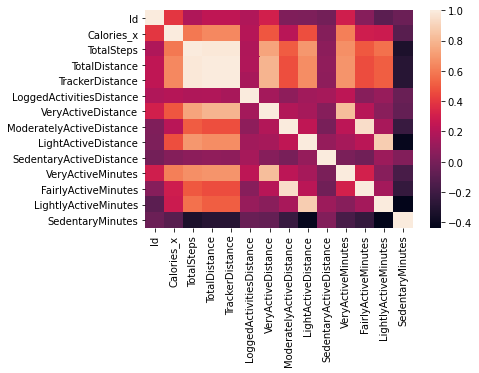

In [22]:
sns.heatmap(df.corr())

In [37]:
ols('Calories_x ~ VeryActiveMinutes + TotalSteps + VeryActiveDistance + LightActiveDistance + FairlyActiveMinutes + TotalDistance + TrackerDistance ', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Calories_x   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     358.6
Date:                Fri, 11 Jun 2021   Prob (F-statistic):          2.44e-259
Time:                        00:36:33   Log-Likelihood:                -6901.3
No. Observations:                 940   AIC:                         1.382e+04
Df Residuals:                     932   BIC:                         1.386e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1671.8517     24.785     67.455      0.000    1623.212    1720.492
VeryActiveMinutes      19.6889      0.725     27.150      0.000      18.266      21.112
TotalSteps             -0.4172      0.017    -25.164      0.000      -0.450      -0.385
VeryActiveDistance   -286.5923     20.589    -13.919      0.000    -326.999    -246.186
LightActiveDistance    18.8681     18.172      1.038      0.299     -16.795      54.531
FairlyActiveMinutes    -1.5487      0.999     -1.551      0.121      -3.509       0.411
TotalDistance         537.8803    102.897      5.227      0.000     335.944     739.816
TrackerDistance       152.9315     99.599      1.535      0.125     -42.534     348.397
==============================================================================
Omnibus:                      106.188   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.824
Skew:                          -0.598   Prob(JB):                     6.35e-62
Kurtosis:                       5.401   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
y_pred = model_fit.predict()
resids = model_fit.resid
y_pred

array([2355.25154289, 2301.3891847 , 2422.57949062, 2409.11390108,
       2503.3730279 , 2530.304207  , 2584.16656518, 2691.89128156,
       2395.64831153, 2274.45800561, 2907.3407143 , 2570.70097564,
       2543.76979654, 3001.59984113, 2436.04508017, 3068.92778886,
       2664.96010246, 2234.06123697, 2718.82246065, 2462.97625926,
       2570.70097564, 2691.89128156, 2503.3730279 , 2624.56333382,
       2341.78595334, 2516.83861745, 2611.09774428, 2638.02892337,
       2638.02892337, 2503.3730279 , 2018.61180422, 2018.61180422,
       2018.61180422, 2018.61180422, 2018.61180422, 2018.61180422,
       2220.59564742, 2247.52682652, 2018.61180422, 2018.61180422,
       2018.61180422, 2018.61180422, 2018.61180422, 2234.06123697,
       2018.61180422, 2018.61180422, 2247.52682652, 2018.61180422,
       2018.61180422, 2166.73328924, 4523.2114599 , 2112.87093105,
       2018.61180422, 2018.61180422, 2018.61180422, 2018.61180422,
       2018.61180422, 2018.61180422, 2018.61180422, 2018.61180

<AxesSubplot:>

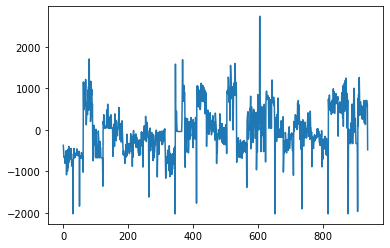

In [39]:
resids.plot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of residuals')]

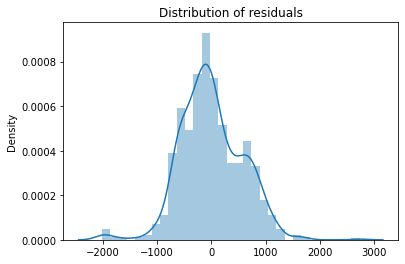

In [42]:
sns.distplot(resids).set(title='Distribution of residuals')
#sns.title('')

In [41]:
exog.index.get_level_values('Id')

Int64Index([1503960366, 1503960366, 1503960366, 1503960366, 1503960366,
            1503960366, 1503960366, 1503960366, 1503960366, 1503960366,
            ...
            8877689391, 8877689391, 8877689391, 8877689391, 8877689391,
            8877689391, 8877689391, 8877689391, 8877689391, 8877689391],
           dtype='int64', name='Id', length=940)

In [153]:
df1 = df.copy()
df1['y_pred']=y_pred
df1 = df1.sort_values(by='Calories_x')

<AxesSubplot:xlabel='VeryActiveMinutes', ylabel='Calories_x'>

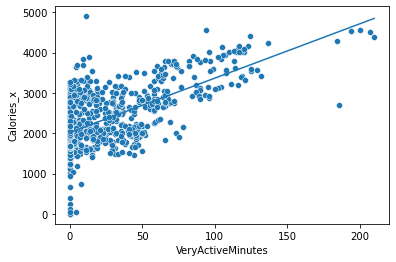

In [156]:
sns.scatterplot(data = df, x = 'VeryActiveMinutes', y = 'Calories_x')
sns.lineplot(data = df1, x = 'VeryActiveMinutes', y = 'y_pred')

In [33]:
X = df.drop(['SedentaryMinutes',      
'SedentaryActiveDistance' ,    
'LoggedActivitiesDistance' ,   
'ModeratelyActiveDistance' ,   
'LightlyActiveMinutes'   ,     
'FairlyActiveMinutes'     ,    
'LightActiveDistance'     ,    
'VeryActiveDistance'    ,      
'TotalSteps'      ,          
'VeryActiveMinutes'   ,        
'TotalDistance'  ,             
'TrackerDistance','Date','Weekday' ], axis=1)

In [26]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(X, df.Calories_x)

LinearRegression()

In [35]:
lr.coef_

array([-2.44805104e-23,  1.00000000e+00])

In [36]:
lr.score(X, df.Calories_x)

1.0

In [59]:
df = pd.get_dummies(df, columns=['Weekday'], drop_first=True)
df.Date = pd.to_datetime(df.Date)
year = pd.Categorical(df.Date)
df = df.set_index(['Id', 'Date'])
df['year'] = year
exog = sm.add_constant(df.VeryActiveMinutes)
mod = PooledOLS(df.Calories_x, exog, check_rank=False)
pooled_res = mod.fit(cov_type='clustered', cluster_entity=True)
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:             Calories_x   R-squared:                        0.3793
Estimator:                  PooledOLS   R-squared (Between):              0.3929
No. Observations:                 940   R-squared (Within):               0.3608
Date:                Tue, Jun 08 2021   R-squared (Overall):              0.3793
Time:                        13:17:33   Log-likelihood                   -7291.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      573.09
Entities:                          33   P-value                           0.0000
Avg Obs:                       28.485   Distribution:                   F(1,938)
Min Obs:                       4.0000                                           
Max Obs:                       31.000   F-statistic (robust):             87.197
                            

In [61]:
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

In [62]:
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

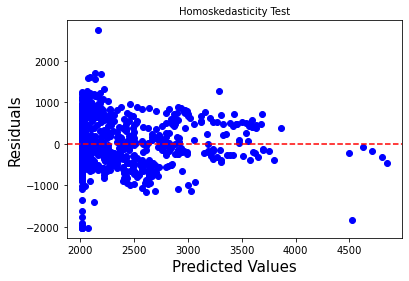

In [68]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 10)
plt.show()

# the White- and the Breusch-Pagan-Test

In [77]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(year, axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(dataset['Calories_x']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM_Stat', 'LM p_val', 'F_Stat', 'Fp_val'] 
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM_Stat', 'LM p_val', 'F_Stat', 'Fp_val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

KeyError: "[Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-05-11 00:00:00')\n Timestamp('2016-05-12 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')\n Timestamp('2016-04-12 00:00:00') Timestamp('2016-04-13 00:00:00')\n Timestamp('2016-04-14 00:00:00') Timestamp('2016-04-15 00:00:00')\n Timestamp('2016-04-16 00:00:00') Timestamp('2016-04-17 00:00:00')\n Timestamp('2016-04-18 00:00:00') Timestamp('2016-04-19 00:00:00')\n Timestamp('2016-04-20 00:00:00') Timestamp('2016-04-21 00:00:00')\n Timestamp('2016-04-22 00:00:00') Timestamp('2016-04-23 00:00:00')\n Timestamp('2016-04-24 00:00:00') Timestamp('2016-04-25 00:00:00')\n Timestamp('2016-04-26 00:00:00') Timestamp('2016-04-27 00:00:00')\n Timestamp('2016-04-28 00:00:00') Timestamp('2016-04-29 00:00:00')\n Timestamp('2016-04-30 00:00:00') Timestamp('2016-05-01 00:00:00')\n Timestamp('2016-05-02 00:00:00') Timestamp('2016-05-03 00:00:00')\n Timestamp('2016-05-04 00:00:00') Timestamp('2016-05-05 00:00:00')\n Timestamp('2016-05-06 00:00:00') Timestamp('2016-05-07 00:00:00')\n Timestamp('2016-05-08 00:00:00') Timestamp('2016-05-09 00:00:00')\n Timestamp('2016-05-10 00:00:00') Timestamp('2016-04-12 00:00:00')\n Timestamp('2016-04-13 00:00:00') Timestamp('2016-04-14 00:00:00')\n Timestamp('2016-04-15 00:00:00') Timestamp('2016-04-16 00:00:00')\n Timestamp('2016-04-17 00:00:00') Timestamp('2016-04-18 00:00:00')\n Timestamp('2016-04-19 00:00:00') Timestamp('2016-04-20 00:00:00')\n Timestamp('2016-04-21 00:00:00') Timestamp('2016-04-22 00:00:00')\n Timestamp('2016-04-23 00:00:00') Timestamp('2016-04-24 00:00:00')\n Timestamp('2016-04-25 00:00:00') Timestamp('2016-04-26 00:00:00')\n Timestamp('2016-04-27 00:00:00') Timestamp('2016-04-28 00:00:00')\n Timestamp('2016-04-29 00:00:00') Timestamp('2016-04-30 00:00:00')\n Timestamp('2016-05-01 00:00:00') Timestamp('2016-05-02 00:00:00')\n Timestamp('2016-05-03 00:00:00') Timestamp('2016-05-04 00:00:00')\n Timestamp('2016-05-05 00:00:00') Timestamp('2016-05-06 00:00:00')\n Timestamp('2016-05-07 00:00:00') Timestamp('2016-05-08 00:00:00')\n Timestamp('2016-05-09 00:00:00') Timestamp('2016-05-10 00:00:00')\n Timestamp('2016-05-11 00:00:00') Timestamp('2016-05-12 00:00:00')] not found in axis"

In [78]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.7644293532278088


# FE-/RE-model will be more suitable

In [80]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
exog = sm.add_constant(df.VeryActiveMinutes)
endog = df.Calories_x
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)
print(re_res)


                          PanelOLS Estimation Summary                           
Dep. Variable:             Calories_x   R-squared:                        0.3674
Estimator:                   PanelOLS   R-squared (Between):              0.3801
No. Observations:                 940   R-squared (Within):               0.3674
Date:                Tue, Jun 08 2021   R-squared (Overall):              0.3739
Time:                        15:13:51   Log-likelihood                   -6837.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      526.24
Entities:                          33   P-value                           0.0000
Avg Obs:                       28.485   Distribution:                   F(1,906)
Min Obs:                       4.0000                                           
Max Obs:                       31.000   F-statistic (robust):             526.24
                            

# More accurate model (FE,RE)

In [160]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
# TotalSteps + VeryActiveDistance + LightActiveDistance + FairlyActiveMinutes + TotalDistance + TrackerDistance
exog = sm.add_constant(df[['TotalSteps','VeryActiveDistance','LightActiveDistance','FairlyActiveMinutes','TotalDistance','TrackerDistance']])
endog = df.Calories_x
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)
print(re_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Calories_x   R-squared:                        0.6659
Estimator:                   PanelOLS   R-squared (Between):              0.1629
No. Observations:                 940   R-squared (Within):               0.6659
Date:                Wed, Jun 09 2021   R-squared (Overall):              0.3512
Time:                        10:38:04   Log-likelihood                   -6537.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      299.33
Entities:                          33   P-value                           0.0000
Avg Obs:                       28.485   Distribution:                   F(6,901)
Min Obs:                       4.0000                                           
Max Obs:                       31.000   F-statistic (robust):             299.33
                            

# Step 4: Perform Hausman-Test

In [89]:
import numpy.linalg as la
from scipy import stats
import numpy as np
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.covdf = b[np.abs(b) < 1e8].size
    
    df = b[np.abs(b) < 1e8].size
    
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res, re_res) 

print('chi-Squared:' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value:'  + str(hausman_results[2]))

chi-Squared:0.5188530393868892
degrees of freedom: 2
p-Value:0.7714938955191963


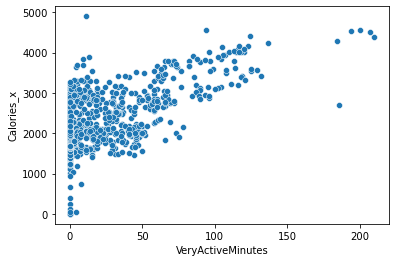

In [96]:
#Visualization
sns.scatterplot(x=df.VeryActiveMinutes, y=df.Calories_x)
plt.show()

In [92]:

# Fit the first stage regression and print summary
results_fs = sm.OLS(df.Calories_x, exog, check_rank=False).fit()   #dependant and Exogenous or right-hand-side variables
print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:             Calories_x   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     573.1
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           3.17e-99
Time:                        16:43:23   Log-Likelihood:                -7291.3
No. Observations:                 940   AIC:                         1.459e+04
Df Residuals:                     938   BIC:                         1.460e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2018.6118     21.97

In [98]:
mean_expr = np.mean(df['Calories_x'])
results_fs.predict(exog=[1, mean_expr])

array([33038.0728098])

In [110]:
print(len(results_fs.predict()),len(df.VeryActiveMinutes), len(df['Calories_x']))

940 940 940


In [124]:
type(results_fs.predict())

numpy.ndarray

In [129]:
ypred = results_fs.predict()
print(ypred)

[[ 0.78543403 21.57125843]
 [ 0.71104532 19.52823748]
 [ 0.70273594 19.30002769]
 ...
 [ 1.12057893 30.77571984]
 [ 1.51626358 41.64285255]
 [ 0.73162092 20.09332838]]


TypeError: unhashable type: 'numpy.ndarray'

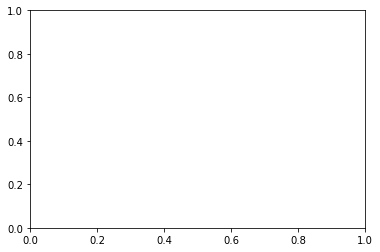

In [125]:
sns.scatterplot(x=df.VeryActiveMinutes, y=results_fs.predict())

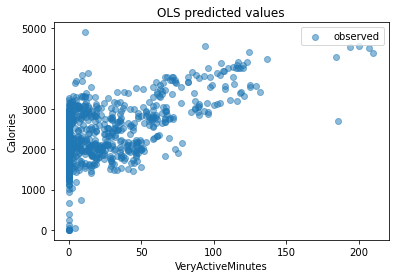

In [127]:
# Plot predicted values

fix, ax = plt.subplots()
# ax.scatter(df.VeryActiveMinutes,y=results_fs.predict(), alpha=0.5,
#         label='predicted')

# Plot observed values

ax.scatter(df.VeryActiveMinutes, df['Calories_x'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('VeryActiveMinutes')
ax.set_ylabel('Calories')
plt.show()

In [15]:
df['const'] = 1
# exog = sm.add_constant(df.VeryActiveMinutes)
# endog = df.Calories_x
# iv = IV2SLS(dependent=df.Calories_x,
#             exog=df['const'],
#             #endog=endog,
#             instruments=df.TotalSteps).fit(cov_type='unadjusted')

# print(iv.summary)


iv = IV2SLS(dependent=df['TotalSteps'],
            exog=df['const'],
            endog=df['Calories_x'],
            instruments=df['VeryActiveMinutes']).fit(cov_type='unadjusted')

print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:             TotalSteps   R-squared:                      0.1082
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1073
No. Observations:                 940   F-statistic:                    469.07
Date:                Wed, Jun 09 2021   P-value (F-stat)                0.0000
Time:                        17:30:40   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const      -1.004e+04     831.00    -12.079     0.0000  -1.167e+04     -8408.7
Calories_x     7.6729     0.3543     21.658     0.00

In [16]:
df['const'] = 1
# Estimate the first stage regression
reg1 = sm.OLS(endog=df['Calories_x'],
              exog=df[['const', 'VeryActiveMinutes']],
              missing='drop').fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             Calories_x   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     573.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           3.17e-99
Time:                        17:31:36   Log-Likelihood:                -7291.3
No. Observations:                 940   AIC:                         1.459e+04
Df Residuals:                     938   BIC:                         1.460e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2018.6118     21.97

In [17]:
#model = ols('Calories_x ~ VeryActiveMinutes', data=df)
# Add a constant term
df['const'] = 1

# Estimate the first stage regression
# reg1 = sm.OLS(endog=df4['avexpr'],
#               exog=df4[['const', 'logem4']],
#               missing='drop').fit()


reg1 = sm.OLS(endog=df['Calories_x'],
              exog=df[['const', 'VeryActiveMinutes']],
              missing='drop').fit()

# Retrieve the residuals
df['resid'] = reg1.resid

# Estimate the second stage residuals
reg2 = sm.OLS(endog=df['TotalSteps'],
              exog=df[['const', 'Calories_x', 'resid']],
              missing='drop').fit()

print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSteps   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     464.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          8.52e-141
Time:                        17:31:43   Log-Likelihood:                -9032.2
No. Observations:                 940   AIC:                         1.807e+04
Df Residuals:                     937   BIC:                         1.808e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.004e+04    624.721    -16.067      0.0